In [1]:
import nltk

/home/snig/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
#nltk.download()

import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot

In [7]:
sarcasm_df = pd.read_csv('sarcasm_df.csv')
sarcasm_df.dropna()
#df['polarity'] = df['sentence'].map(lambda text: TextBlob(text).sentiment.polarity)

sarcasm_df.head()

,Unnamed: 0,sentence,is_sarcastic,sentence_length,tokenized_sentence
0,66528,it was obvious they wanted more size at WR wh...,1.0,19,"[18, 39, 2146, 49, 683, 68, 2439, 23, 10395, 4..."
1,70824,I've been guilty of posting #sarcastic notes l...,1.0,15,"[284, 135, 1814, 8, 2183, 96, 3963, 45, 167, 1..."
2,38987,"#DonaldTrump in the middle of the stage, other...",0.0,17,"[1297, 9, 2, 605, 8, 2, 1072, 179, 689, 663, 1..."
3,4180,There is a 100 chance of Pickleman’s Pizza bei...,0.0,16,"[109, 11, 6, 698, 985, 8, 81832, 1227, 95, 510..."
4,10276,a look at transgender sex workers living in china,0.0,9,"[6, 175, 23, 2218, 391, 1268, 579, 9, 768, 0, ..."


WORD CLOUD FOR 1000 MOST FREQUENT WORDS IN SARCASTIC SENTENCES


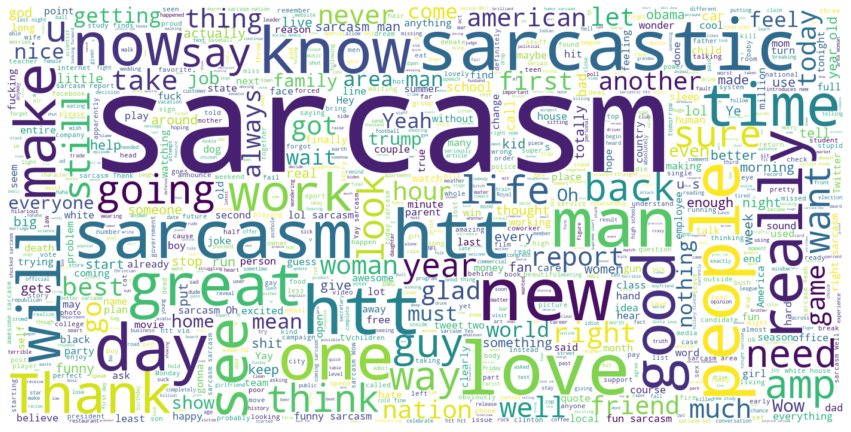

In [8]:
words = sarcasm_df[sarcasm_df.is_sarcastic == 1]['sentence']

wc = WordCloud(background_color="white", max_words=1000, width = 1400, height = 700)
wc.generate(' '.join(words))
print ("WORD CLOUD FOR 1000 MOST FREQUENT WORDS IN SARCASTIC SENTENCES")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

/home/snig/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='sentence_length', ylabel='Density'>

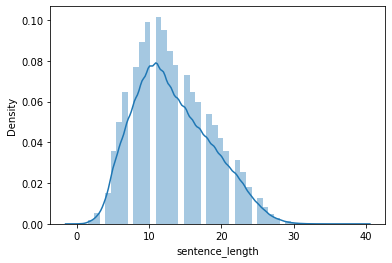

In [9]:
#sarcasm_df['sentence_length'] = sarcasm_df['sentence'].apply(lambda x: len(x.split())) 

sns.distplot(sarcasm_df['sentence_length'])

In [10]:
##DISTRIBUTION OF TOP 20 UNIGRAMS BEFORE REMOVING STOPWORDS

In [11]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus.values.astype('U'))
    bag_of_words = vec.transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(sarcasm_df['sentence'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['sentence' , 'count'])
df1.groupby('sentence').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in sentence before removing stop words')


the 35801
to 30341
sarcasm 26969
htt 25704
irony 19050
of 19016
in 16296
is 14095
and 13552
for 13454
you 11809
on 11263
it 10587
that 9617
http 9239
my 6936
this 6619
with 6554
ironic 6544
at 5850


In [12]:
##DISTRIBUTION OF TOP 20 UNIGRAMS AFTER REMOVING STOPWORDS

In [13]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus.values.astype('U'))
    bag_of_words = vec.transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(sarcasm_df['sentence'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['sentence' , 'count'])
df2.groupby('sentence').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in sentence after removing stop words')

sarcasm 26969
htt 25704
irony 19050
http 9239
ironic 6544
just 4639
news 3858
peace 3413
like 3370
love 3353
late 3304
people 3253
education 3178
humor 3126
new 3105
politics 3012
drugs 2964
amp 2882
day 2700
trump 2582


In [14]:
##DISTRIBUTION OF TOP BIGRAMS BEFORE REMOVING STOP WORDS

In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus.values.astype('U'))
    bag_of_words = vec.transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(sarcasm_df['sentence'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['sentence' , 'count'])
df3.groupby('sentence').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in sentence before removing stop words')


in the 2563
htt htt 2316
of the 2257
sarcasm http 1896
to be 1754
on the 1679
for the 1409
irony htt 1327
to the 1291
sarcasm htt 1269
irony http 1096
htt politics 1027
you re 977
this is 942
is the 928
at the 909
htt news 877
out of 831
going to 814
to get 807


In [16]:
##DISTRIBUTION OF TOP BIGRAMS AFTER REMOVING STOP WORDS

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus.values.astype('U'))
    bag_of_words = vec.transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(sarcasm_df['sentence'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['sentence' , 'count'])
df4.groupby('sentence').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in sentence after removing stop words')


htt htt 2338
sarcasm http 1911
irony htt 1337
sarcasm htt 1283
irony http 1119
htt politics 1053
htt news 885
donald trump 685
humor htt 625
education inspirational 465
inspirational lol 461
drugs htt 456
design tech 417
education design 395
tech long 394
htt humor 382
funny sarcasm 369
ironic htt 366
htt irony 343
year old 336


In [18]:
##DISTRIBUTION OF TOP TRIGRAMS BEFORE REMOVING STOPWORDS

In [19]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus.values.astype('U'))
    bag_of_words = vec.transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(sarcasm_df['sentence'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['sentence' , 'count'])
df5.groupby('sentence').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in sentence before removing stop words')


education inspirational lol 461
design tech long 394
education design tech 393
htt news politics 296
inspirational lol htt 242
lol htt htt 241
tech long reads 240
long reads htt 240
reads htt htt 220
funnypictures funnytweets humor 193
the irony of 186
going to be 184
one of the 183
pict funnypictures funnytweets 170
humor htt htt 170
oh the irony 156
internet browsers list 155
of the day 154
browsers list htt 154
list htt internet 154


In [20]:
##The distribution of top part-of-speech tags of sentence corpus

In [21]:
blob = TextBlob(str(sarcasm_df['sentence']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for sentence corpus')